In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# plt.style.use("ggplot")
# plt.rcParams['font.family'] = "serif"
# plt.rc('text', usetex=True)
import smplotlib
np.set_printoptions(precision=4)
from scipy.integrate import odeint
from scipy.optimize import root, minimize, root_scalar, minimize_scalar



NameError: name 'cset' is not defined

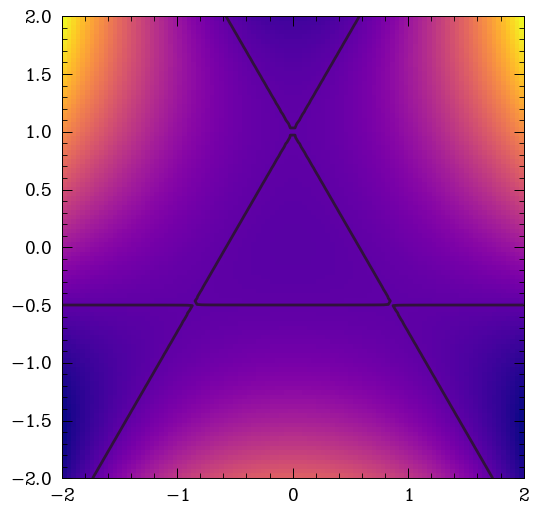

In [2]:
def potencial(x,y):
    return 0.5*x**2+0.5*(y**2)+(x**2)*y-(y**3)/3
xi = np.linspace(-2,2,100)
yi = np.linspace(-2,2,100)
xx,yy = np.meshgrid(xi,yi)
slika_potenciala = potencial(xx,yy)
im = plt.imshow(slika_potenciala,cmap="plasma", extent=(xi.min(),xi.max(),yi.min(),yi.max())) # drawing the function
# adding the Contour lines with labels
plt.cset = plt.contour(slika_potenciala,[6**(-1)],linewidths=2,extent=(xi.min(),xi.max(),yi.min(),yi.max()))
plt.clabel(cset,inline=True,fmt='%1.2f',fontsize=10)
plt.colorbar(im) # adding the colobar on the right
plt.title(r"""Potencial in ekvipotencialne
črte energij $H=\left\{ 0.1, 0.2, 0.3 \right\}$""")
#plt.savefig("2-2-skica-potenciala.pdf", bbox_inches="tight")
plt.show()

In [ ]:

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
from numpy import sin,sqrt

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xx,yy,slika_potenciala, rstride=1, cstride=1,
                      cmap="plasma",linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.view_init(elev=30., azim=-30)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig("2-3d-skica-potenciala.pdf", bbox_inches="tight")
plt.show()

In [ ]:
%%time
def trajektorija(y=0,alfa=np.pi/4,H=0.01,ND=1000,TS = 0.1):
    from collections import namedtuple
    rezultat = namedtuple("Rezultat", ["x","y","u","v","par"])
    """Sprejme y,alfa,H=0.01,
    vrne [koordinate_x, koordinate_y]."""
    omegakvadrat = 2*H-y**2+2/3*y**3
    assert omegakvadrat > 0, "Zvečaj H ali zmanjšaj y"
    w = np.sqrt(omegakvadrat)
    u = w * np.cos(alfa)
    v = w * np.sin(alfa)
    INPUT = np.array([0,y,u,v]) #[x0,y0,u0,v0]

    #ND = 1000 #Čas opazovanja
    def diff_eqs(INP,t):
            '''The main set of equations'''
            Y=np.zeros(4)
            x,y,u,v = INP
            Y[0] = u
            Y[1] = v
            Y[2] = -x -2*x*y
            Y[3] = -y-x**2+y**2
            return Y   # For odeint
    t_start = 0.0; t_end = ND; t_inc = TS
    t_range = np.arange(t_start, t_end+t_inc, t_inc)
    RES = odeint(diff_eqs,INPUT,t_range)
    xi = RES[:,0]
    yi = RES[:,1]
    from collections import namedtuple
    rezultat = namedtuple("Rezultat", ["x","y","u","v","slovar_parametrov"])
    return rezultat(RES[:,0],RES[:,1],RES[:,2],RES[:,3], {"y":y,"alfa":alfa,"H":H,"ND":ND,"TS":TS})

CPU times: user 16 µs, sys: 0 ns, total: 16 µs
Wall time: 22.2 µs


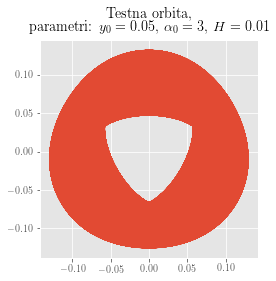

CPU times: user 1.86 s, sys: 59.4 ms, total: 1.92 s
Wall time: 2.28 s


In [ ]:
%%time
traj = trajektorija(y=0.05,alfa=3, ND=40e2)
fig, ax = plt.subplots()
ax.plot(traj.x, traj.y, linewidth=1)
ax.set_aspect("equal")
plt.title(r"""Testna orbita,
parametri: $y_0={{{y}}}$, $\alpha_0={{{alfa}}}$, $H={{{H}}}$""".\
          format(**traj.slovar_parametrov))
#plt.savefig("2-4-testna-orbita_daljsa.pdf", bbox_inches="tight")
plt.show()

In [ ]:
traj = trajektorija(y=0,alfa=np.pi/2, ND=40e2)
traj.x

In [ ]:
%%time
traj = trajektorija(y=0.1,alfa=3.135, ND=1500)
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(traj.x, traj.y, linewidth=0.2)
ax.set_aspect("equal")
plt.title(r"""Testna orbita,
parametri: $y_0={{{y}}}$, $\alpha_0={{{alfa}}}$, $H={{{H}}}$""".\
          format(**traj.slovar_parametrov))
#plt.savefig("2--testna-orbita_daljsa.pdf", bbox_inches="tight")
plt.show()

In [ ]:
import gc
gc.collect()
gc.get_stats()


In [ ]:
def poincare(trajektorija):
    x = trajektorija.x
    y = trajektorija.y
    v = trajektorija.v
    poincare_v = []
    poincare_y = []
    for ((index_1, i), (index_2 , j) ) in zip(enumerate(x[:-1]), enumerate(x[1:])):
        if np.sign(i) == 0:
            poincare_v.append(v[index_1])
            poincare_y.append(y[index_1])
            continue
        elif np.sign(j) == 0:
            poincare_v.append(v[index_2])
            poincare_y.append(y[index_2])
            continue
        elif np.sign(i) != np.sign(j):
            x1,y1,v1 = i, y[index_1], v[index_1]
            x2,y2,v2 = j, y[index_2], v[index_2]
            k = x2-x1
            t = x1/k
            poincare_y.append((y2-y1)*t+y1)
            poincare_v.append((v2-y1)*t+v1)
    from collections import namedtuple
    Rezultat = namedtuple("Poincarejev_presek", ["y","v"])
    return Rezultat(np.array([poincare_y]), np.array([poincare_v]))



In [ ]:
%%time
traj = trajektorija(y=0.107,alfa=0.935, ND=1000, TS=0.1, H=0.123)
presek = poincare(traj)
fig, [ax1,ax2] = plt.subplots(1,2,sharey=True)
ax1.set_title("Orbita")
ax1.plot(traj.x, traj.y, linewidth=0.2)
ax1.set_aspect("equal")
ax1.set_xlabel(r"Koordinata $x$")
ax1.set_ylabel(r"Koordinata $y$")

ax2.scatter(presek.y, presek.v,s=1)
ax2.set_aspect("equal")
ax2.set_xlabel(r"Koordinata $y$")
ax2.set_ylabel(r"Koordinata $\dot{y}$")
ax2.set_title("Poincaréjev presek")
fig.suptitle(r"""Testna orbita,
parametri: $y_0={{{y}}}$, $\alpha_0={{{alfa}}}$, $H={{{H}}}$""".\
          format(**traj.slovar_parametrov), x=0.5,y=1.12)

plt.tight_layout()
plt.savefig("2-6-orbite-preseki9.pdf", bbox_inches="tight")
plt.show()

In [ ]:
%%time
def najdi_periorbite(H, guess=(0,1.5)):
    """Sprejme energijo H, **kwargs: guess=(y0,alfa0)
    """
    def poincare_kvadrant(trajektorija):
        x = trajektorija.x
        y = trajektorija.y
        v = trajektorija.v
        poincare_v = []
        poincare_y = []
        for ((index_1, i), (index_2 , j) ) in zip(enumerate(x[:-1]), enumerate(x[1:])):
            if np.sign(i) == 0:
                poincare_v.append(v[index_1])
                poincare_y.append(y[index_1])
                continue
            elif np.sign(j) == 0:
                poincare_v.append(v[index_2])
                poincare_y.append(y[index_2])
                continue
            elif np.sign(i) != np.sign(j):
                x1,y1,v1 = i, y[index_1], v[index_1]
                x2,y2,v2 = j, y[index_2], v[index_2]
                k = x2-x1
                t = x1/k
                py = (y2-y1)*t+y1
                pv = (v2-y1)*t+v1
                if py >= 0 and pv >= 0:
                    poincare_y.append(py)
                    poincare_v.append(pv)
        from collections import namedtuple
        Rezultat = namedtuple("Poincarejev_presek", ["y","v"])
        return Rezultat(np.array([poincare_y]), np.array([poincare_v]))
    def povrsina(arej):
        y,alfa = arej
        traj = trajektorija(y=y,alfa=alfa, ND=1000, TS=0.1, H=H)
        presek = poincare_kvadrant(traj)
        return np.var(presek.y)*np.var(presek.v)
    def najdi_maximalni_dovoljeni_y(H):
        def funk(y):
            return 2*H-y**2+2/3*y**3
        return root_scalar(funk, x0=0,x1=1).root
    maksy = najdi_maximalni_dovoljeni_y(H)
    return minimize(povrsina, x0=guess, bounds=((0,maksy),(None, None)),method="CG").x


#y,alfa=najdi_periorbite(0.123, guess=(0.106,0.935))

traj = trajektorija(y=0.107,alfa=0.935, ND=1000, TS=0.1, H=0.123)
presek = poincare(traj)
fig, [ax1,ax2] = plt.subplots(1,2,sharey=True)
ax1.set_title("Orbita")
ax1.plot(traj.x, traj.y, linewidth=0.2)
ax1.set_aspect("equal")
ax1.set_xlabel(r"Koordinata $x$")
ax1.set_ylabel(r"Koordinata $y$")

ax2.scatter(presek.y, presek.v,s=1)
ax2.set_aspect("equal")
ax2.set_xlabel(r"Koordinata $y$")
ax2.set_ylabel(r"Koordinata $\dot{y}$")
ax2.set_title("Poincaréjev presek")
fig.suptitle(r"""Minimizirana orbita,
parametri: $y_0={{{y:0.3f}}}$, $\alpha_0={{{alfa:0.3f}}}$, $H={{{H}}}$""".\
          format(**traj.slovar_parametrov), x=0.5,y=1)

plt.tight_layout()
plt.savefig("2-8-minimizacija2.pdf", bbox_inches="tight")
plt.show()

In [ ]:
def streljaj(H):
    def najdi_maximalni_dovoljeni_y(H):
        def funk(y):
            return 2*H-y**2+2/3*y**3
        return root_scalar(funk, x0=0,x1=1).root

    y,alfa=najdi_periorbite(0.01, guess=(0.1,1))
    maksy = najdi_maximalni_dovoljeni_y(H)
    traj = trajektorija(y=0.99*min(y,maksy),alfa=alfa, ND=1000, TS=0.1, H=H)
    presek = poincare(traj)
    fig, [ax1,ax2] = plt.subplots(1,2,sharey=True)
    ax1.set_title("Orbita")
    ax1.plot(traj.x, traj.y, linewidth=0.2)
    ax1.set_aspect("equal")
    ax1.set_xlabel(r"Koordinata $x$")
    ax1.set_ylabel(r"Koordinata $y$")

    ax2.scatter(presek.y, presek.v,s=1)
    ax2.set_aspect("equal")
    ax2.set_xlabel(r"Koordinata $y$")
    ax2.set_ylabel(r"Koordinata $\dot{y}$")
    ax2.set_title("Poincaréjev presek")
    fig.suptitle(r"""Minimizirana orbita,
    parametri: $y_0={{{y:0.3f}}}$, $\alpha_0={{{alfa:0.3f}}}$, $H={{{H:0.3f}}}$""".\
              format(**traj.slovar_parametrov), x=0.5,y=1)

    plt.tight_layout()
    #plt.savefig("2-8-minimizacija.pdf", bbox_inches="tight")
    plt.show()
for H in np.linspace(0.001,0.1,100):
    streljaj(H)

In [ ]:
#traj = trajektorija(y=0.0001,alfa=1.5, ND=100, TS=1, H=0.16)
#presek = poincare(traj)

presek.y[presek.y >= 0]


In [ ]:
presek.v >= 0